In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-poster")
import seaborn as sns

In [2]:
crps = pd.read_csv("../data/retro_scores.csv", header=None)

columns = ['state','data_date'] 
columns.extend([n for n in range(1,29)])

crps.columns = columns

crps

,state,data_date,1,2,3,4,5,6,7,8,...,19,20,21,22,23,24,25,26,27,28
0,NSW,2020-07-01 00:00:00,1.087556,0.515954,0.525408,0.527663,0.254072,1.804313,4.970191,1.118168,...,11.038007,9.285153,8.349811,14.511649,7.468592,9.133921,9.914810,9.054655,12.400894,10.621332
1,VIC,2020-07-01 00:00:00,93.542766,88.119295,133.733162,175.589150,141.296951,191.244023,177.280437,201.682216,...,289.441253,403.853983,380.032562,364.908414,390.027493,392.822214,349.075421,347.968776,419.935042,368.497125
2,NSW,2020-08-05 00:00:00,6.434017,3.670950,3.210362,3.293771,7.163556,3.594560,2.034215,1.190788,...,1.177152,5.473102,4.850961,4.988127,5.867028,4.425316,6.048984,4.612709,4.685951,4.018815
3,VIC,2020-08-05 00:00:00,90.425796,91.437727,73.819864,90.392356,76.569448,79.547580,60.423322,46.968716,...,91.367984,101.588573,118.749113,136.293421,152.993205,165.412839,177.935194,187.027667,193.442182,200.759966
4,NSW,2020-09-02 00:00:00,1.552425,1.575746,1.468140,1.468437,1.470567,2.076527,1.806001,1.477224,...,1.610715,1.987188,1.576237,1.979461,1.971116,1.692916,2.062660,2.084968,1.940006,2.046625
5,VIC,2020-09-02 00:00:00,13.612956,7.851224,9.693779,6.413314,11.180264,11.231187,11.338802,5.449158,...,5.839563,6.387863,6.739674,7.340422,8.155501,8.755720,10.023759,10.990385,12.490095,14.480433


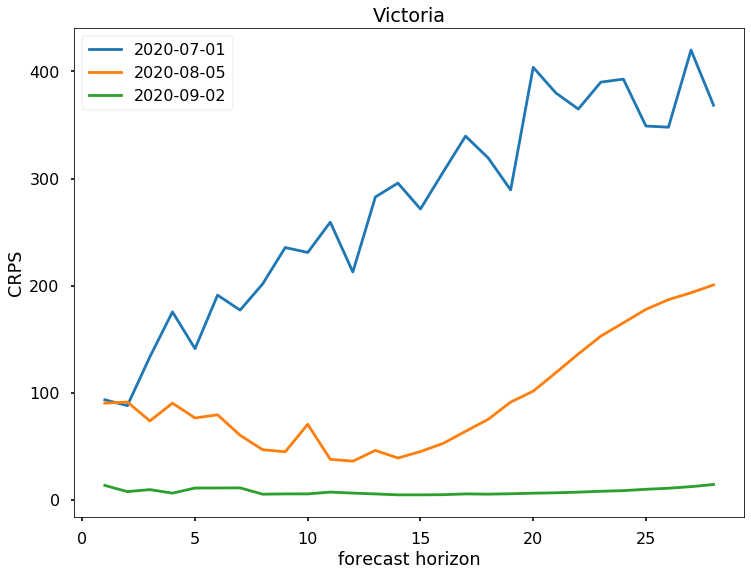

In [3]:
fig,ax = plt.subplots(figsize=(12,9))

plot_df = pd.melt(
    crps,
    id_vars = ['state','data_date']
)
plot_df['data_date'] = plot_df.data_date.apply(lambda x : x[:10])
sns.lineplot(
    data=plot_df.loc[plot_df.state=='VIC'],
    hue='data_date',
    x='variable',
    y='value',
    ax=ax
)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:])
ax.set_ylabel("CRPS")
ax.set_xlabel("forecast horizon")
ax.set_title("Victoria")
plt.savefig("crps_VIC.png",dpi=300)
plt.show()

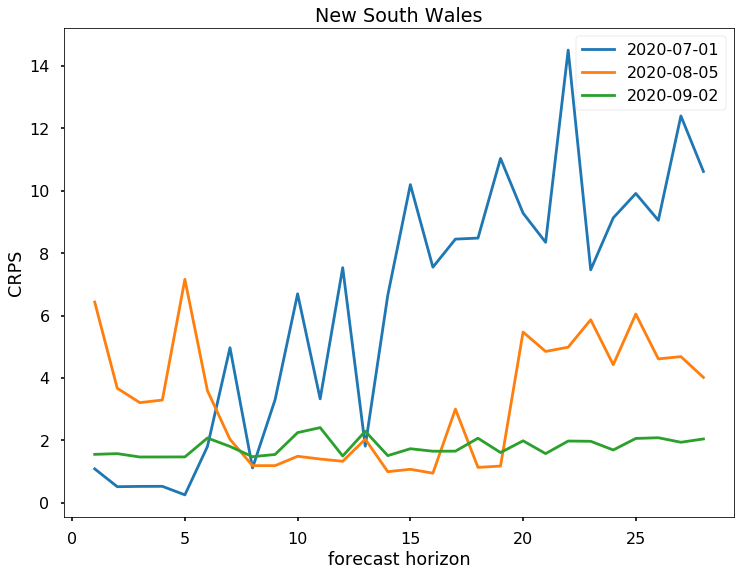

In [4]:
fig,ax = plt.subplots(figsize=(12,9))

sns.lineplot(
    data=plot_df.loc[plot_df.state=='NSW'],
    hue='data_date',
    x='variable',
    y='value',
    ax=ax
)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:])
ax.set_ylabel("CRPS")
ax.set_xlabel("forecast horizon")
ax.set_title("New South Wales")
plt.savefig("../crps_NSW.png",dpi=300)
plt.show()

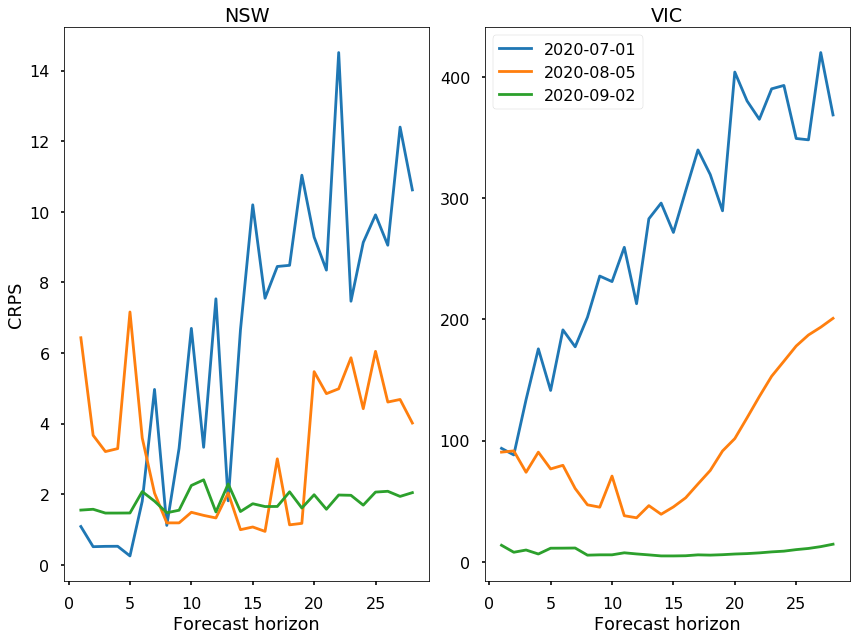

In [5]:
fig,ax = plt.subplots(figsize=(12,9), ncols=2, squeeze=False, sharey=False,sharex=True)
states_to_plot = ['NSW','VIC']

for i, state in enumerate(states_to_plot):
    row = i//2
    col = i%2
    legend=False
    if i==len(states_to_plot)-1:
        #last plot give legend
        legend = 'brief'
    sns.lineplot(
        data=plot_df.loc[plot_df.state==state],
        hue='data_date',
        x='variable',
        y='value',
        ax=ax[row,col],
        legend=legend,
    )
    ax[row,col].set_title(state)
    if col==0:
        ax[row,col].set_ylabel("CRPS")
    else:
        ax[row,col].set_ylabel("")
    if row==len(states_to_plot)//2-1:
        ax[row,col].set_xlabel("Forecast horizon")
       
       
handles, labels = ax[row,col].get_legend_handles_labels()
ax[row,col].legend(handles=handles[1:], labels=labels[1:])
plt.tight_layout()
plt.savefig("../crps_big.png",dpi=300)




In [36]:
## random walk
train = 60
rand_walk = pd.read_csv("../data/scores"+str(train)+".csv", header=None)

columns = ['model','state','data_date'] 
columns.extend([n for n in range(1,29)])
rand_walk.columns = columns

rand_walk.head()

,model,state,data_date,1,2,3,4,5,6,7,...,19,20,21,22,23,24,25,26,27,28
0,random_walk,NSW,2020-07-01 00:00:00,0.339745,0.378593,0.408021,0.309615,1.496276,5.081359,0.884278,...,9.317664,8.259087,15.199841,7.194376,9.170179,10.138615,9.175329,13.107457,11.081043,15.107677
1,random_walk,QLD,2020-07-01 00:00:00,0.042359,0.063245,0.081213,0.099263,0.103911,0.120409,0.123458,...,0.193805,0.429369,0.193045,0.438427,0.197997,0.433618,0.211037,0.436878,0.218852,1.000752
2,random_walk,SA,2020-07-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000
3,random_walk,TAS,2020-07-01 00:00:00,0.032690,0.039449,0.047595,0.050377,0.054111,0.057952,0.060345,...,0.634330,0.053993,0.054320,0.053601,0.058450,0.057353,0.056379,0.053947,0.051239,0.047736
4,random_walk,VIC,2020-07-01 00:00:00,93.642766,138.150786,178.951196,143.996250,192.903754,178.101797,201.334578,...,402.238188,380.544327,367.934990,396.327478,402.828672,363.160914,366.743141,445.149440,398.663235,374.968625


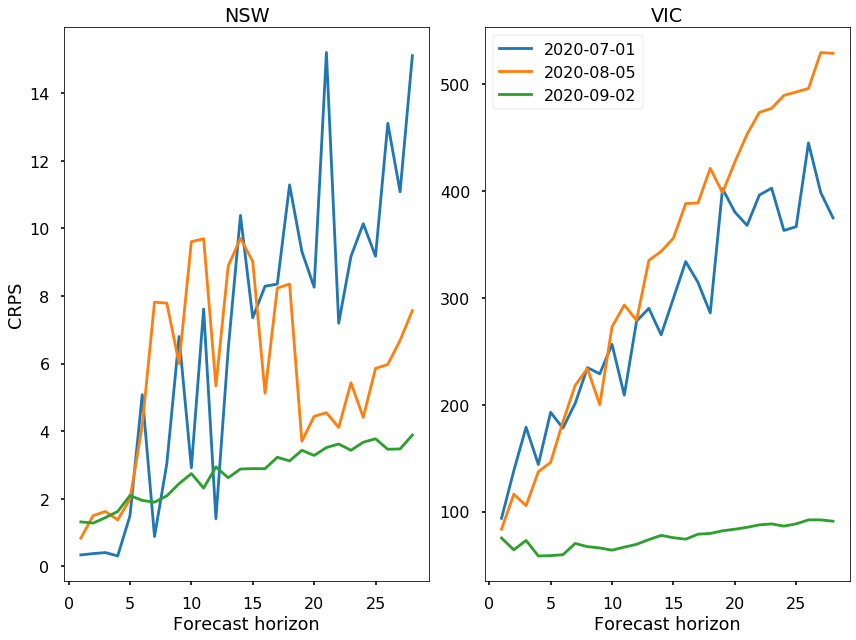

In [37]:
fig,ax = plt.subplots(figsize=(12,9), ncols=2, squeeze=False, sharey=False,sharex=True)
states_to_plot = ['NSW','VIC']

plot_df = pd.melt(
    rand_walk,
    id_vars = ['state','data_date','model']
)
plot_df['data_date'] = plot_df.data_date.apply(lambda x : x[:10])

for i, state in enumerate(states_to_plot):
    row = i//2
    col = i%2
    legend=False
    if i==len(states_to_plot)-1:
        #last plot give legend
        legend = 'brief'
    sns.lineplot(
        data=plot_df.loc[plot_df.state==state],
        hue='data_date',
        x='variable',
        y='value',
        ax=ax[row,col],
        legend=legend,
    )
    ax[row,col].set_title(state)
    if col==0:
        ax[row,col].set_ylabel("CRPS")
    else:
        ax[row,col].set_ylabel("")
    if row==len(states_to_plot)//2-1:
        ax[row,col].set_xlabel("Forecast horizon")
       
       
handles, labels = ax[row,col].get_legend_handles_labels()
ax[row,col].legend(handles=handles[1:], labels=labels[1:])
plt.tight_layout()
plt.savefig("../crps_rand_big.png",dpi=300)

In [38]:
#skill score

def skill(model_score, base_score):
    """
    Given the model score and base score, calculate the relative score
    """
    
    score = 1 - model_score/base_score
    
    return score

rand_walk_s = rand_walk.loc[rand_walk.state.isin(states_to_plot)].set_index(['model','state','data_date'])
crps_s = crps.set_index(['state','data_date'])

score = pd.DataFrame(skill(crps_s.values, rand_walk_s.values), index=crps_s.index)

score

,,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
state,data_date,,,,,,,,,,,,,,,,,,,,,
NSW,2020-07-01 00:00:00,-2.201094,-0.362820,-0.287698,-0.704255,0.830197,0.644915,-4.620621,0.631277,0.514207,-1.296531,...,-0.184632,-0.124235,0.450665,-1.017083,0.185557,0.099096,-0.080595,0.309198,-0.119109,0.296958
VIC,2020-07-01 00:00:00,0.001068,0.362151,0.252684,-0.219401,0.267526,-0.073791,0.119473,0.140796,-0.029299,0.099217,...,0.280423,-0.061253,-0.032880,0.079276,0.031778,-0.081675,0.048175,0.218310,-0.053358,0.017259
NSW,2020-08-05 00:00:00,-6.704267,-1.445168,-0.975033,-1.392801,-2.603737,0.139337,0.739722,0.847110,0.801682,0.844823,...,0.682162,-0.232874,-0.067024,-0.213775,-0.080698,-0.003468,-0.033117,0.228037,0.299064,0.468979
VIC,2020-08-05 00:00:00,-0.084133,0.213724,0.300127,0.341555,0.475559,0.567598,0.722995,0.799126,0.775018,0.741118,...,0.770748,0.762233,0.738049,0.712334,0.679642,0.662206,0.638970,0.623021,0.634870,0.620555
NSW,2020-09-02 00:00:00,-0.178915,-0.229271,-0.016820,0.095827,0.298494,-0.064019,0.049260,0.291849,0.367088,0.180619,...,0.530861,0.394589,0.551669,0.453426,0.426152,0.539037,0.453590,0.398258,0.441732,0.473149
VIC,2020-09-02 00:00:00,0.819015,0.877597,0.867040,0.890197,0.809445,0.811414,0.838184,0.918791,0.913169,0.910249,...,0.928730,0.923423,0.920904,0.916138,0.907712,0.898581,0.886673,0.880749,0.864532,0.840724


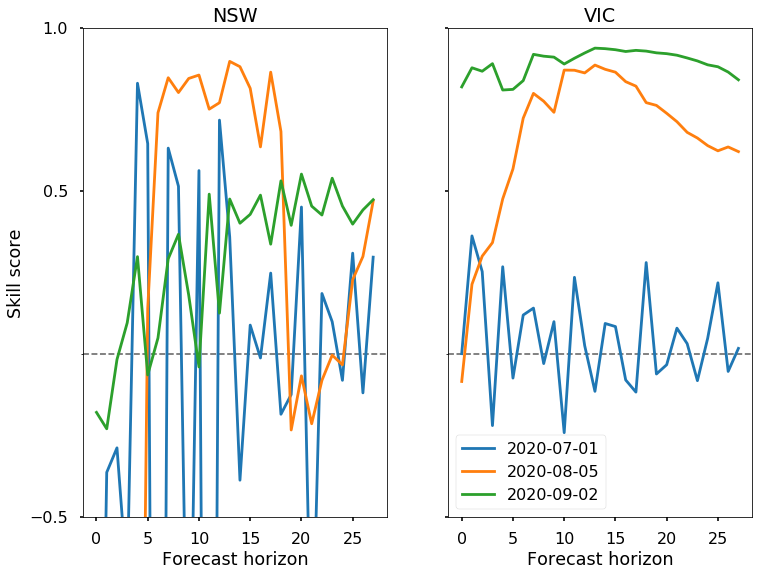

In [42]:
fig,ax = plt.subplots(figsize=(12,9), ncols=2, squeeze=False, sharey=True,sharex=True)
states_to_plot = ['NSW','VIC']
plot = pd.melt(score.reset_index(), id_vars =['state','data_date'])
plot.data_date = plot.data_date.apply(lambda x: x[:10])

for i, state in enumerate(states_to_plot):
    row = i//2
    col = i%2
    legend=False
    if i==len(states_to_plot)-1:
        #last plot give legend
        legend = 'brief'
    sns.lineplot(
        data=plot.loc[plot.state==state],
        x='variable',
        y='value',
        hue='data_date',
        ax=ax[row,col],
        legend=legend,
    )
    ax[row,col].set_ylim(-0.5,1)
    ax[row,col].set_yticks([0.0001],minor=True)
    ax[row,col].set_yticks([-0.5,0.5,1])
    ax[row,col].yaxis.grid(which='minor', linestyle='--',alpha=0.6, color='black')
    
    ax[row,col].set_title(state)
    if col==0:
        ax[row,col].set_ylabel("Skill score")
    else:
        ax[row,col].set_ylabel("")
    if row==len(states_to_plot)//2-1:
        ax[row,col].set_xlabel("Forecast horizon")

#remove legend title        
handles, labels = ax[row,col].get_legend_handles_labels()
ax[row,col].legend(handles=handles[1:], labels=labels[1:])
plt.savefig("../skill_big.png",dpi=300)
plt.show()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  


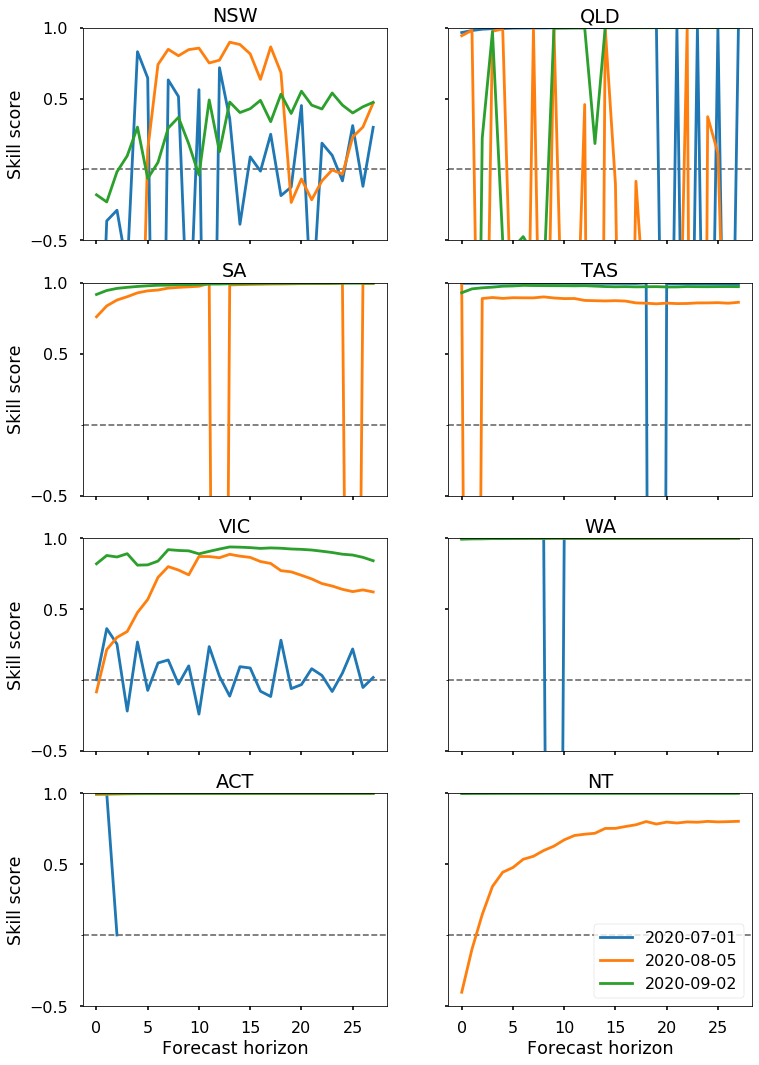

In [51]:
fig,ax = plt.subplots(figsize=(12,18), ncols=2,nrows=4, squeeze=False, sharey=True,sharex=True)
states_to_plot = ['NSW','QLD','SA','TAS','VIC','WA','ACT','NT']

#read in all states crps
crps_all = pd.read_csv("../data/retro_all_scores.csv",header=None)

columns = ['state','data_date'] 
columns.extend([n for n in range(1,29)])

crps_all.columns = columns


crps_all = crps_all.set_index(['state','data_date'])
rand_walk_all = rand_walk.loc[rand_walk.state.isin(states_to_plot)].set_index(['model','state','data_date'])

score = pd.DataFrame(skill(crps_all.values, rand_walk_all.values), index=crps_all.index)



plot = pd.melt(score.reset_index(), id_vars =['state','data_date'])
plot.data_date = plot.data_date.apply(lambda x: x[:10])

for i, state in enumerate(states_to_plot):
    row = i//2
    col = i%2
    legend=False
    if i==len(states_to_plot)-1:
        #last plot give legend
        legend = 'brief'
    sns.lineplot(
        data=plot.loc[plot.state==state],
        x='variable',
        y='value',
        hue='data_date',
        ax=ax[row,col],
        legend=legend,
    )
    ax[row,col].set_ylim(-0.5,1)
    ax[row,col].set_yticks([0.0001],minor=True)
    ax[row,col].set_yticks([-0.5,0.5,1])
    ax[row,col].yaxis.grid(which='minor', linestyle='--',alpha=0.6, color='black')
    
    ax[row,col].set_title(state)
    if col==0:
        ax[row,col].set_ylabel("Skill score")
    else:
        ax[row,col].set_ylabel("")
    if row==len(states_to_plot)//2-1:
        ax[row,col].set_xlabel("Forecast horizon")

#remove legend title        
handles, labels = ax[row,col].get_legend_handles_labels()
ax[row,col].legend(handles=handles[1:], labels=labels[1:])
plt.savefig("../skill_all.png",dpi=300)
plt.show()

In [14]:
plot

,state,data_date,variable,value
0,NSW,2020-07-01 00:00:00,0,-0.557340
1,VIC,2020-07-01 00:00:00,0,0.044269
2,NSW,2020-08-05 00:00:00,0,-0.484166
3,VIC,2020-08-05 00:00:00,0,0.594703
4,NSW,2020-09-02 00:00:00,0,-0.385585
...,...,...,...,...
163,VIC,2020-07-01 00:00:00,27,0.017486
164,NSW,2020-08-05 00:00:00,27,-0.269412
165,VIC,2020-08-05 00:00:00,27,-2.165392
166,NSW,2020-09-02 00:00:00,27,-0.637496
